In [9]:
import numpy as np
import pandas as pd
from os import listdir
import os.path
import zipfile
import six.moves.urllib as urllib
import json
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [24]:
from os import listdir

In [4]:
ACTIVITIES_MAP = {
    0: 'no_activity',
    1: 'lying',
    2: 'sitting',
    3: 'standing',
    4: 'walking',
    5: 'running',
    6: 'cycling',
    7: 'nordic_walking',
    9: 'watching_tv',
    10: 'computer_work',
    11: 'car_driving',
    12: 'ascending_stairs',
    13: 'descending_stairs',
    16: 'vaccuum_cleaning',
    17: 'ironing',
    18: 'folding_laundry',
    19: 'house_cleaning',
    20: 'playing_soccer',
    24: 'rope_jumping'
}
def map_class(datasets_filled, exclude_activities):
    ysetall = [set(np.array(data.activityID)) - set(exclude_activities)
               for data in datasets_filled]
    class_ids = list(set.union(*[set(y) for y in ysetall]))
    class_labels = [ACTIVITIES_MAP[i] for i in class_ids]
    nr_classes = len(class_ids)
    mapclasses = {class_ids[i]: i for i in range(len(class_ids))}
    return class_labels, nr_classes, mapclasses

In [11]:
kolonlar = ['timestamp', 'activityID', 'heartrate', 'hand_temperature', 
                      'hand_acc_16g_x', 'hand_acc_16g_y', 'hand_acc_16g_z', 
                      'hand_acc_6g_x', 'hand_acc_6g_y', 'hand_acc_6g_z', 
                      'hand_gyroscope_x', 'hand_gyroscope_y', 'hand_gyroscope_z', 
                      'hand_magnometer_x', 'hand_magnometer_y', 'hand_magnometer_z', 
                      'hand_orientation_0', 'hand_orientation_1'
                      ,'hand_orientation_2', 
                      'hand_orientation_3', 'chest_temperature', 
                      'chest_acc_16g_x', 'chest_acc_16g_y', 'chest_acc_16g_z', 
                      'chest_acc_6g_x', 'chest_acc_6g_y', 'chest_acc_6g_z', 
                      'chest_gyroscope_x', 'chest_gyroscope_y', 'chest_gyroscope_z', 
                      'chest_magnometer_x', 'chest_magnometer_y', 'chest_magnometer_z', 
                      'chest_orientation_0', 'chest_orientation_1', 'chest_orientation_2', 
                      'chest_orientation_3', 'ankle_temperature', 'ankle_acc_16g_x', 
                      'ankle_acc_16g_y', 'ankle_acc_16g_z', 
                      'ankle_acc_6g_x', 'ankle_acc_6g_y', 'ankle_acc_6g_z', 
                      'ankle_gyroscope_x', 'ankle_gyroscope_y', 'ankle_gyroscope_z', 
                      'ankle_magnometer_x', 'ankle_magnometer_y', 'ankle_magnometer_z', 
                      'ankle_orientation_0', 'ankle_orientation_1', 'ankle_orientation_2', 'ankle_orientation_3']

columns_to_use = ['hand_acc_16g_x', 'hand_acc_16g_y', 'hand_acc_16g_z', 
                      'hand_acc_6g_x', 'hand_acc_6g_y', 'hand_acc_6g_z', 
                      'hand_gyroscope_x', 'hand_gyroscope_y', 'hand_gyroscope_z', 
                      'hand_magnometer_x', 'hand_magnometer_y', 'hand_magnometer_z', 
                      'chest_acc_16g_x', 'chest_acc_16g_y', 'chest_acc_16g_z', 
                      'chest_acc_6g_x', 'chest_acc_6g_y', 'chest_acc_6g_z', 
                      'chest_gyroscope_x', 'chest_gyroscope_y', 'chest_gyroscope_z', 
                      'chest_magnometer_x', 'chest_magnometer_y', 'chest_magnometer_z', 
                       'ankle_acc_16g_x', 
                      'ankle_acc_16g_y', 'ankle_acc_16g_z', 
                      'ankle_acc_6g_x', 'ankle_acc_6g_y', 'ankle_acc_6g_z', 
                      'ankle_gyroscope_x', 'ankle_gyroscope_y', 'ankle_gyroscope_z', 
                      'ankle_magnometer_x', 'ankle_magnometer_y', 'ankle_magnometer_z']


### Burada veriseti 8 parça olduğundan dolayı pandas kütüphanesi ile her bir parça okunarak dataframe'e kaydedildi.Daha sonra datasetler verikümesi isminde birleştirildi.

In [12]:
datadir = os.path.join('PAMAP2_Dataset', 'dataset')
print(datadir)
# load the files and put them in a list of pandas dataframes:

df1 = pd.read_csv(datadir+'/subject101.dat', names=kolonlar, sep=' ',low_memory=False, skiprows=1) 
df2=pd.read_csv(datadir+'/subject102.dat', names=kolonlar, sep=' ',low_memory=False, skiprows=1)
df3=pd.read_csv(datadir+'/subject103.dat', names=kolonlar, sep=' ',low_memory=False, skiprows=1)
df4=pd.read_csv(datadir+'/subject104.dat', names=kolonlar, sep=' ',low_memory=False, skiprows=1)
df5=pd.read_csv(datadir+'/subject105.dat', names=kolonlar, sep=' ',low_memory=False, skiprows=1)
df6=pd.read_csv(datadir+'/subject106.dat', names=kolonlar, sep=' ',low_memory=False, skiprows=1)
df7=pd.read_csv(datadir+'/subject107.dat', names=kolonlar, sep=' ',low_memory=False, skiprows=1)
df8=pd.read_csv(datadir+'/subject108.dat', names=kolonlar, sep=' ',low_memory=False, skiprows=1)
frames = [df1,df2,df3,df4,df5,df6,df7,df8]
totalveri = pd.concat(frames)
print(totalveri.shape)
datasets_filled = [totalveri.interpolate()]
verikümesi=pd.DataFrame(datasets_filled[0])


PAMAP2_Dataset\dataset
(2864048, 54)


In [30]:
verikümesi # verikümesi

,timestamp,activityID,heartrate,hand_temperature,hand_acc_16g_x,hand_acc_16g_y,hand_acc_16g_z,hand_acc_6g_x,hand_acc_6g_y,hand_acc_6g_z,...,ankle_gyroscope_x,ankle_gyroscope_y,ankle_gyroscope_z,ankle_magnometer_x,ankle_magnometer_y,ankle_magnometer_z,ankle_orientation_0,ankle_orientation_1,ankle_orientation_2,ankle_orientation_3
2927,37.66,1,100.0,30.3750,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,...,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,1.000000,0.000000,0.000000,0.000000
2928,37.67,1,100.0,30.3750,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,...,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656,1.000000,0.000000,0.000000,0.000000
2929,37.68,1,100.0,30.3750,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,...,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,1.000000,0.000000,0.000000,0.000000
2930,37.69,1,100.0,30.3750,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,...,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799,1.000000,0.000000,0.000000,0.000000
2931,37.70,1,100.0,30.3750,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,...,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388247,3888.37,24,201.0,30.8125,-1.56754,-9.74184,-1.75943,-1.64378,-9.65324,-1.40287,...,0.119553,-0.046894,-0.102102,-31.9957,13.2739,39.2913,0.139952,0.812179,0.163477,0.542267
388248,3888.38,24,201.0,30.8125,-1.63804,-9.58850,-1.64554,-1.65935,-9.62301,-1.49353,...,0.099501,-0.089781,-0.078137,-31.8664,13.2679,39.4336,0.139882,0.812291,0.164300,0.541869
388249,3888.39,24,201.0,30.8125,-1.79054,-9.58767,-1.68632,-1.65946,-9.51741,-1.61456,...,0.086514,-0.041586,-0.096625,-31.8711,13.2669,39.0081,0.139848,0.812234,0.165141,0.541708
388250,3888.40,24,201.0,30.8125,-1.64687,-9.51497,-1.91533,-1.68948,-9.48700,-1.62970,...,0.036153,-0.020759,-0.067416,-31.0895,12.5846,39.1535,0.139315,0.812261,0.165650,0.541649


In [31]:
verikümesi.head(5) #verikümesinin ilk 5 verisi

,timestamp,activityID,heartrate,hand_temperature,hand_acc_16g_x,hand_acc_16g_y,hand_acc_16g_z,hand_acc_6g_x,hand_acc_6g_y,hand_acc_6g_z,...,ankle_gyroscope_x,ankle_gyroscope_y,ankle_gyroscope_z,ankle_magnometer_x,ankle_magnometer_y,ankle_magnometer_z,ankle_orientation_0,ankle_orientation_1,ankle_orientation_2,ankle_orientation_3
2927,37.66,1,100.0,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,...,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,1.0,0.0,0.0,0.0
2928,37.67,1,100.0,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,...,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656,1.0,0.0,0.0,0.0
2929,37.68,1,100.0,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,...,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,1.0,0.0,0.0,0.0
2930,37.69,1,100.0,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,...,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799,1.0,0.0,0.0,0.0
2931,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,...,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1.0,0.0,0.0,0.0


In [33]:
verikümesi.tail() #verikümesinin son verileri

,timestamp,activityID,heartrate,hand_temperature,hand_acc_16g_x,hand_acc_16g_y,hand_acc_16g_z,hand_acc_6g_x,hand_acc_6g_y,hand_acc_6g_z,...,ankle_gyroscope_x,ankle_gyroscope_y,ankle_gyroscope_z,ankle_magnometer_x,ankle_magnometer_y,ankle_magnometer_z,ankle_orientation_0,ankle_orientation_1,ankle_orientation_2,ankle_orientation_3
388247,3888.37,24,201.0,30.8125,-1.56754,-9.74184,-1.75943,-1.64378,-9.65324,-1.40287,...,0.119553,-0.046894,-0.102102,-31.9957,13.2739,39.2913,0.139952,0.812179,0.163477,0.542267
388248,3888.38,24,201.0,30.8125,-1.63804,-9.58850,-1.64554,-1.65935,-9.62301,-1.49353,...,0.099501,-0.089781,-0.078137,-31.8664,13.2679,39.4336,0.139882,0.812291,0.164300,0.541869
388249,3888.39,24,201.0,30.8125,-1.79054,-9.58767,-1.68632,-1.65946,-9.51741,-1.61456,...,0.086514,-0.041586,-0.096625,-31.8711,13.2669,39.0081,0.139848,0.812234,0.165141,0.541708
388250,3888.40,24,201.0,30.8125,-1.64687,-9.51497,-1.91533,-1.68948,-9.48700,-1.62970,...,0.036153,-0.020759,-0.067416,-31.0895,12.5846,39.1535,0.139315,0.812261,0.165650,0.541649
388251,3888.41,24,201.0,30.8125,-1.72084,-9.47611,-1.87809,-1.70518,-9.51713,-1.67492,...,0.055919,-0.015741,-0.064166,-31.7594,14.1633,39.2911,0.139644,0.812080,0.166316,0.541632


In [34]:
verikümesi.activityID.value_counts()  #aktivite idlere göre verilerin sayısı

activityID
4     238761
17    238690
1     192523
3     189931
7     188107
2     185188
16    175353
6     164600
12    117216
13    104944
5      98199
24     42969
Name: count, dtype: int64

In [35]:
verikümesi.nunique()

timestamp               407576
activityID                  12
heartrate                 5703
hand_temperature           190
hand_acc_16g_x          975284
hand_acc_16g_y         1067265
hand_acc_16g_z         1022118
hand_acc_6g_x          1020491
hand_acc_6g_y          1096789
hand_acc_6g_z          1043246
hand_gyroscope_x       1465829
hand_gyroscope_y       1432896
hand_gyroscope_z       1410730
hand_magnometer_x       935937
hand_magnometer_y       961283
hand_magnometer_z       862059
hand_orientation_0      858245
hand_orientation_1     1080359
hand_orientation_2     1000641
hand_orientation_3     1091843
chest_temperature          159
chest_acc_16g_x        1002154
chest_acc_16g_y         688501
chest_acc_16g_z        1008888
chest_acc_6g_x         1185402
chest_acc_6g_y          698704
chest_acc_6g_z         1154461
chest_gyroscope_x      1400328
chest_gyroscope_y      1446596
chest_gyroscope_z      1377947
chest_magnometer_x     1090549
chest_magnometer_y      554254
chest_ma

In [36]:
verikümesi.describe().T #verilerin ortalama, min, max gibi değerlerin gösterimi

,count,mean,std,min,25%,50%,75%,max
timestamp,1936481.0,1710.621331,1091.181667,3.766000e+01,750.530000,1485.860000,2666.810000,4245.680000
activityID,1936481.0,8.029295,6.116767,1.000000e+00,3.000000,6.000000,13.000000,24.000000
heartrate,1936481.0,107.352527,26.931537,5.700000e+01,86.000000,104.000000,124.000000,202.000000
hand_temperature,1936481.0,32.776669,1.741638,2.750000e+01,31.687500,33.187500,34.062500,35.500000
hand_acc_16g_x,1936481.0,-4.966938,6.237596,-1.453670e+02,-8.975810,-5.466800,-0.975101,62.859600
hand_acc_16g_y,1936481.0,3.567535,6.862460,-1.043010e+02,1.060940,3.524080,6.438390,155.699000
hand_acc_16g_z,1936481.0,3.618111,3.938757,-1.014520e+02,1.172610,3.441540,6.534250,141.100000
hand_acc_6g_x,1936481.0,-4.899684,6.244352,-6.121470e+01,-8.872420,-5.397600,-0.921974,52.821400
hand_acc_6g_y,1936481.0,3.555696,6.555389,-6.184170e+01,1.061780,3.564360,6.447600,62.259800
hand_acc_6g_z,1936481.0,3.803881,3.924271,-6.193470e+01,1.375730,3.673060,6.782080,61.923400


##  Aktivite isimleri ve aktivite idlere görebir grafik çizimi yapılmıştır.

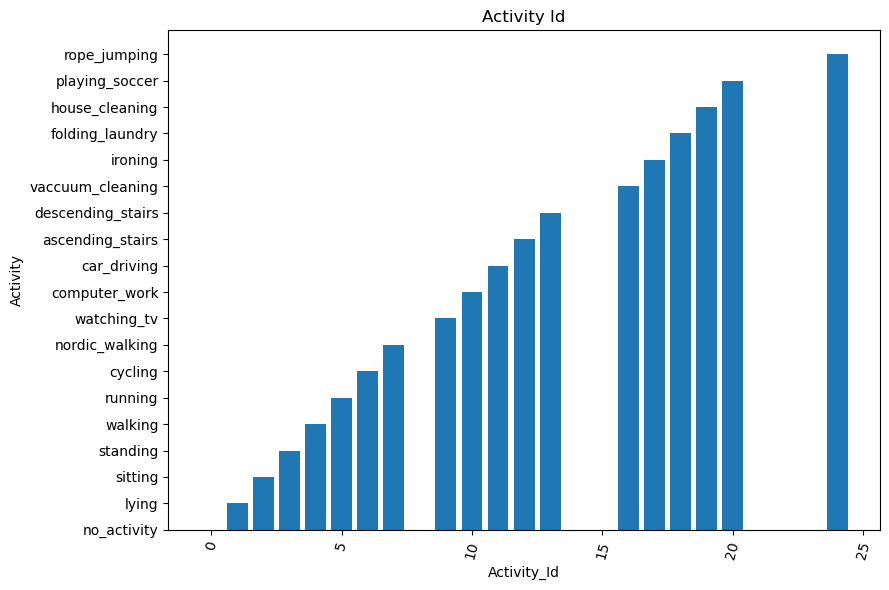

In [15]:
plt.figure(figsize=(9, 6))
plt.bar(ACTIVITIES_MAP.keys(), ACTIVITIES_MAP.values())
plt.xlabel('Activity_Id')
plt.ylabel('Activity')
plt.title('Activity Id')
plt.xticks(rotation=75)
plt.tight_layout()

# Save or display the plot
plt.savefig('activity_counts.png')  # Save to a file
plt.show()  # Display the plot

## Bütün aktivitelerden değeri olmayan (0 ya da NaN) değerler çıkarılmıştır. Map fonksiyonu ile idler yeni idlere atanmıştır.Çıkarılan idler ve toplam kaç aktivite kaldığı listelenmiştir 

In [6]:
all_activities = [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 24,0]
include_activities = [1, 2, 3, 4, 5, 6, 7, 12, 13, 16, 17, 24]
print(len(include_activities))
exclude_activities = [n for n in all_activities if n not in include_activities]
print(exclude_activities)

12
[9, 10, 11, 18, 19, 20, 0]


## Seçilen aktivitelere map fonksiyonu ile yeni idler verilmiştir.

In [13]:
class_labels, nr_classes, mapclasses = map_class(datasets_filled, exclude_activities)
print(class_labels)
print(nr_classes)
print(mapclasses)

['lying', 'sitting', 'standing', 'walking', 'running', 'cycling', 'nordic_walking', 'ascending_stairs', 'descending_stairs', 'vaccuum_cleaning', 'ironing', 'rope_jumping']
12
{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 12: 7, 13: 8, 16: 9, 17: 10, 24: 11}


<Axes: title={'center': 'Top heartrate in people'}, xlabel='heartrate', ylabel='count'>

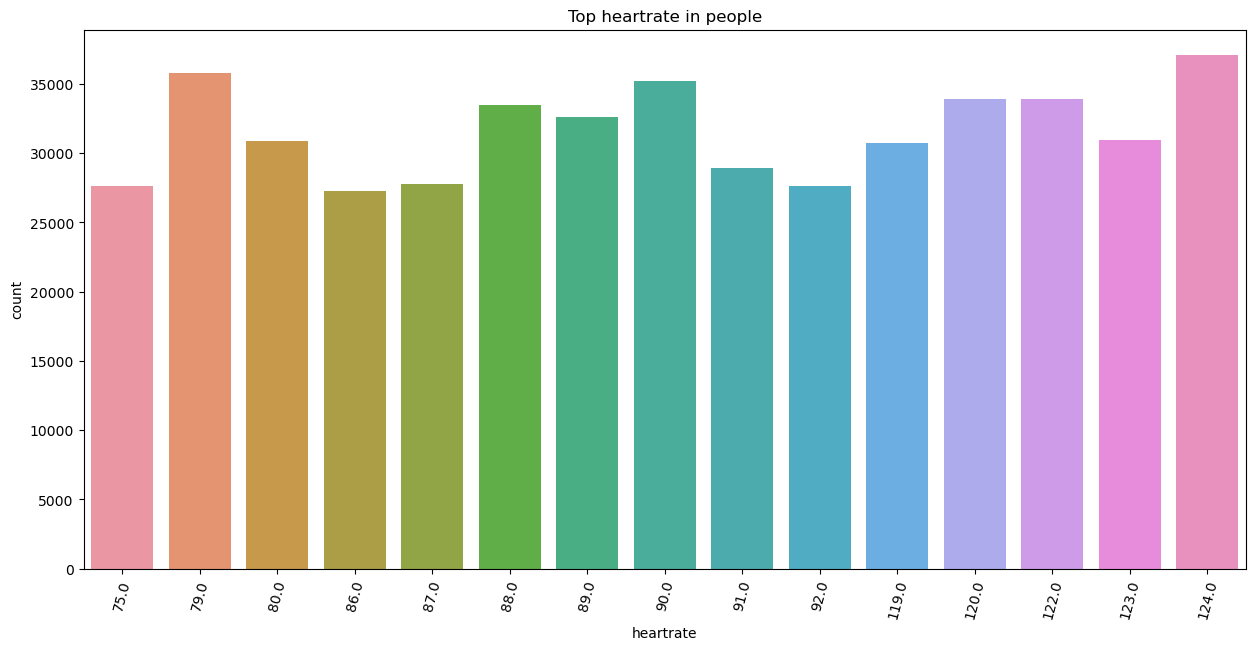

In [45]:
heartrate = verikümesi.heartrate.value_counts().head(15)
plt.figure(figsize=(15,7))
plt.xticks(rotation=75)
plt.title('Top heartrate in people')
sns.barplot(x=heartrate.index, y=heartrate)

In [11]:
for i in exclude_activities:
    verikümesi=verikümesi[verikümesi.activityID != i]

### Eğitim burada başlıyor. X ler özellikler(vücudun her bir bölgesine yerleştirilen sensörler), y ler ise yapılan aktivitelerin idleri.

In [12]:
X = verikümesi[columns_to_use]
y = verikümesi['activityID']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [15]:
Logitic_array=[]
accuracy_lr=[]
weights, params = [], []
coefficients = np.linspace(0.0000001, 200, 100)
 

In [16]:
index =0
for c in coefficients:
    index=index+1
    lr = LogisticRegression(C=c, random_state=0,n_jobs=-1,verbose=0)
    lr.fit(X_train, y_train)
    y_hat = lr.predict(X_test)
    accuracy_lr.append(accuracy_score(y_test,y_hat))
    params.append(c)
    print('Tamamlanan : % {0}'.format(index/100*100),end = '\r',flush=False )

#Maximum accuracy değerine karşılık C değeri bulunuyor ve tekrar accuracy hesaplanıyor
x=np.argmax(accuracy_lr)
C_value=params[x]
C_value

lr = LogisticRegression(C=C_value, random_state=0,n_jobs=-1,verbose=0)
lr.fit(X_train, y_train)
y_hat = lr.predict(X_test)

 


In [17]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import itertools
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    plt.figure(figsize=(10,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    fig=plt.figure(figsize=(60,20))
 
    

Confusion matrix, without normalization
Normalized confusion matrix


<Figure size 640x480 with 0 Axes>

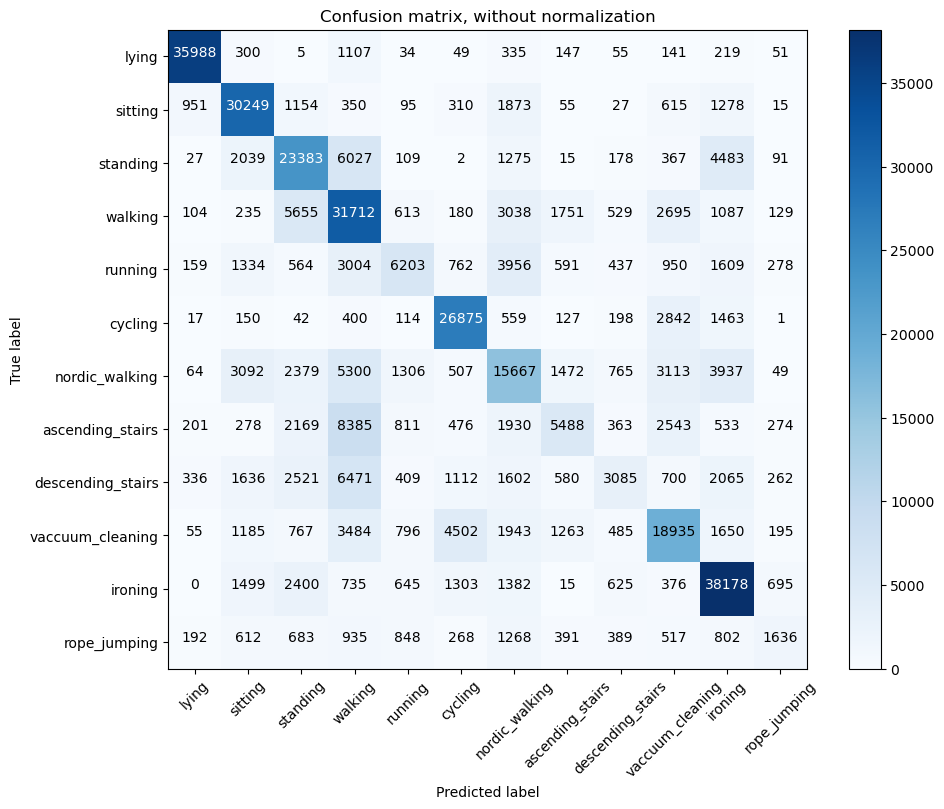

<Figure size 6000x2000 with 0 Axes>

<Figure size 640x480 with 0 Axes>

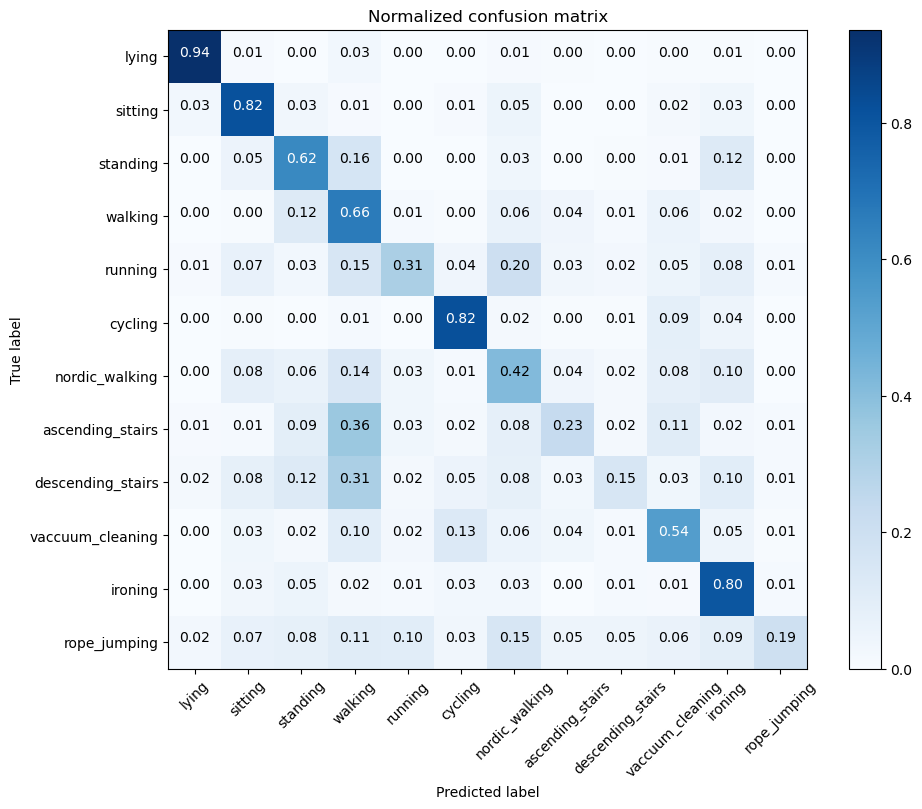

<Figure size 6000x2000 with 0 Axes>

In [18]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_labels,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_labels, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [19]:
Logitic_array=np.zeros(4)
Logitic_array[0]=precision_score(y_test, y_hat,average='macro')
Logitic_array[1]=recall_score(y_test, y_hat, average='macro')
Logitic_array[2]=f1_score(y_test,y_hat,average='macro')
Logitic_array[3]=accuracy_score(y_test,y_hat)


In [21]:
df = pd.DataFrame([Logitic_array], 
                  columns=['Precision', 'Recall', 'F1 Score','Accuracy Score'], 
                  index=['Lgitic Reggression'])
df

,Precision,Recall,F1 Score,Accuracy Score
Lgitic Reggression,0.57952,0.540967,0.542445,0.612964


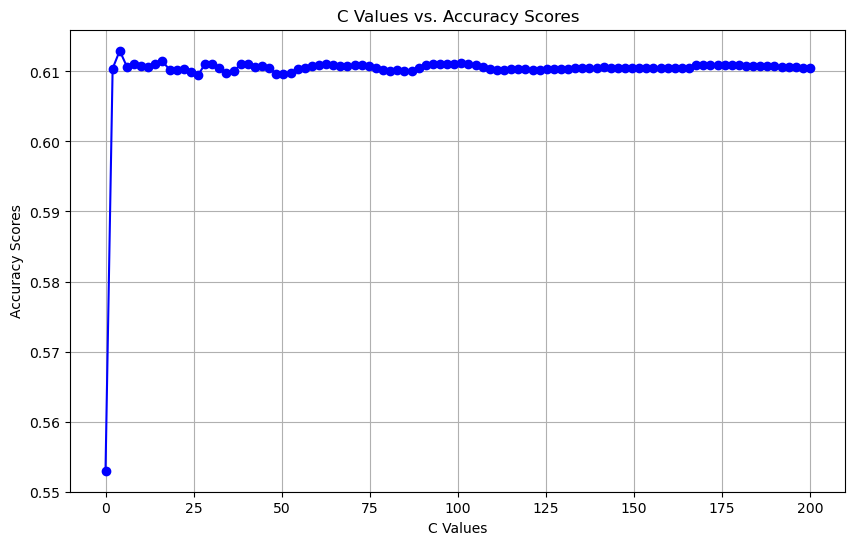

In [91]:
df = pd.DataFrame([coefficients,accuracy_lr],
                  index=['C Values', 'Accuracy Scores'])
df=df.T
df
import matplotlib.pyplot as plt

# Çizim
plt.figure(figsize=(10, 6))
plt.plot(coefficients, accuracy_lr, marker='o', linestyle='-', color='b')

# Eksen etiketleri
plt.xlabel('C Values')
plt.ylabel('Accuracy Scores')
plt.title('C Values vs. Accuracy Scores')


# Çizgi grafiği gösterme
plt.grid(True)
plt.show()


In [74]:
class_weight = 'balanced'
classes = np.unique(y)
class_weights = compute_class_weight(class_weight, classes=classes, y=y)
class_weight_dic = dict(zip(classes, class_weights))
class_weight_dic

{1: 0.838203314236048,
 2: 0.871403204671289,
 3: 0.8496423262483042,
 4: 0.6758784586539119,
 5: 1.643330549869822,
 6: 0.980397428108546,
 7: 0.857880975544061,
 12: 1.3767183376558376,
 13: 1.5377097944300453,
 16: 0.9202774783817025,
 17: 0.6760795034005055,
 24: 3.7555776645178307}

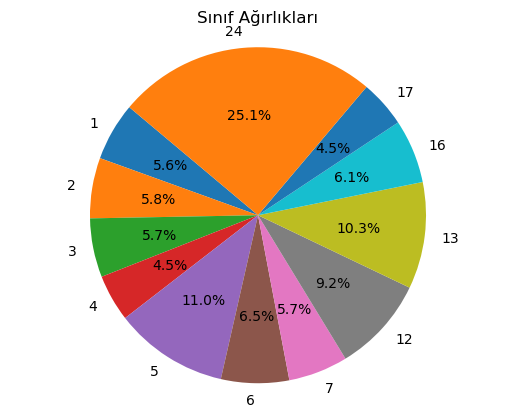

In [1]:
import matplotlib.pyplot as plt

class_weight_dic = {
    1: 0.838203314236048,
    2: 0.871403204671289,
    3: 0.8496423262483042,
    4: 0.6758784586539119,
    5: 1.643330549869822,
    6: 0.980397428108546,
    7: 0.857880975544061,
    12: 1.3767183376558376,
    13: 1.5377097944300453,
    16: 0.9202774783817025,
    17: 0.6760795034005055,
    24: 3.7555776645178307
}

labels = class_weight_dic.keys()
sizes = class_weight_dic.values()

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Sınıf Ağırlıkları')
plt.show()


In [75]:
model_gini = RandomForestClassifier(bootstrap=True, n_estimators=100,n_jobs=-1, class_weight = class_weight_dic)
model_gini.fit(X_train,y_train)

RandomForestClassifier(class_weight={1: 0.838203314236048, 2: 0.871403204671289,
                                     3: 0.8496423262483042,
                                     4: 0.6758784586539119,
                                     5: 1.643330549869822, 6: 0.980397428108546,
                                     7: 0.857880975544061,
                                     12: 1.3767183376558376,
                                     13: 1.5377097944300453,
                                     16: 0.9202774783817025,
                                     17: 0.6760795034005055,
                                     24: 3.7555776645178307},
                       n_jobs=-1)

In [84]:
y_hat = model_gini.predict(X_test)

In [85]:
rfc_array=np.zeros(4)
rfc_array[0]=precision_score(y_test, y_hat,average='macro')
rfc_array[1]=recall_score(y_test, y_hat, average='macro')
rfc_array[2]=f1_score(y_test,y_hat,average='macro')
rfc_array[3]=accuracy_score(y_test,y_hat)


In [86]:
rfc_df = pd.DataFrame([rfc_array], 
                  columns=['Precision', 'Recall', 'F1 Score','Accuracy Score'], 
                  index=['Random Forest Classifier'])
rfc_df

,Precision,Recall,F1 Score,Accuracy Score
Random Forest Classifier,0.99743,0.996908,0.997168,0.997206


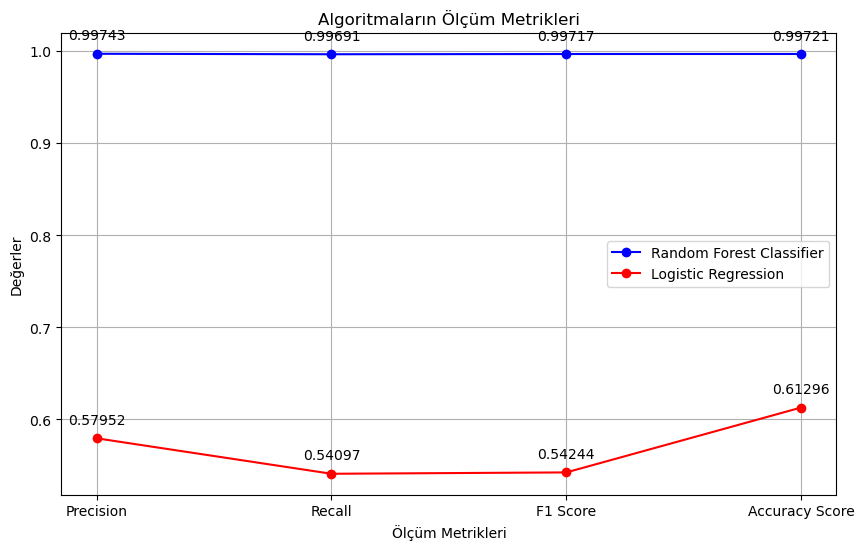

In [88]:
import matplotlib.pyplot as plt

# Veriler
algoritmalar = ['Precision', 'Recall', 'F1 Score', 'Accuracy Score']
rfc_degerler = [0.99743, 0.996908, 0.997168, 0.997209]
logistic_degerler = [0.57952, 0.540967, 0.542445, 0.612964]

# Çizim
plt.figure(figsize=(10, 6))

# Random Forest Classifier
plt.plot(algoritmalar, rfc_degerler, marker='o', linestyle='-', color='b', label='Random Forest Classifier')

# Logistic Regression
plt.plot(algoritmalar, logistic_degerler, marker='o', linestyle='-', color='r', label='Logistic Regression')

# Eksen etiketleri
plt.xlabel('Ölçüm Metrikleri')
plt.ylabel('Değerler')
plt.title('Algoritmaların Ölçüm Metrikleri')

# Değerlerin yanına yazdırılması
for i, txt in enumerate(rfc_degerler):
    plt.annotate("{:.5f}".format(txt), (algoritmalar[i], rfc_degerler[i]), textcoords="offset points", xytext=(0,10), ha='center')
for i, txt in enumerate(logistic_degerler):
    plt.annotate("{:.5f}".format(txt), (algoritmalar[i], logistic_degerler[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Çizgi grafiği gösterme
plt.legend()
plt.grid(True)
plt.show()
